In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import math


In [2]:
data=pd.read_csv("Breast_cancer_data.csv")

In [3]:
data.head(100)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.990,10.38,122.80,1001.0,0.11840,0
1,20.570,17.77,132.90,1326.0,0.08474,0
2,19.690,21.25,130.00,1203.0,0.10960,0
3,11.420,20.38,77.58,386.1,0.14250,0
4,20.290,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
95,20.260,23.03,132.40,1264.0,0.09078,0
96,12.180,17.84,77.79,451.1,0.10450,1
97,9.787,19.94,62.11,294.5,0.10240,1
98,11.600,12.84,74.34,412.6,0.08983,1


anayze data

In [4]:
import seaborn as sns


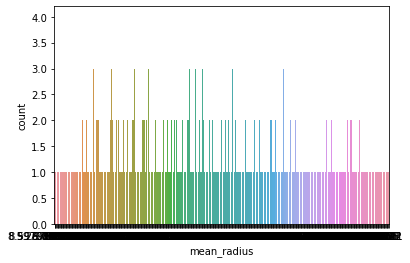

In [5]:
sns.countplot(x="mean_radius",data=data)





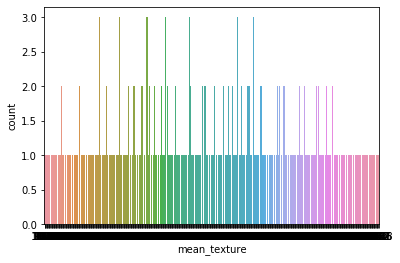

In [6]:
sns.countplot(x="mean_texture",data=data)

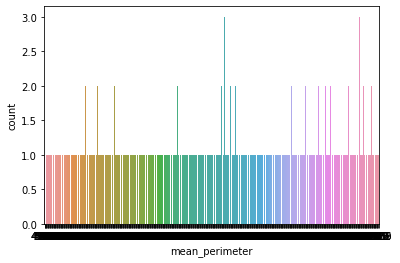

In [7]:
sns.countplot(x="mean_perimeter",data=data)

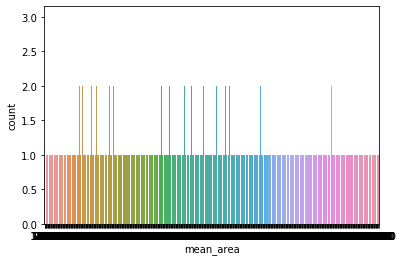

In [8]:
sns.countplot(x="mean_area",data=data)

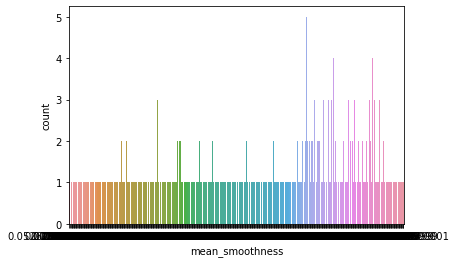

In [9]:
sns.countplot(x="mean_smoothness",data=data)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB



data wrangling

In [11]:
data.isnull()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
564,False,False,False,False,False,False
565,False,False,False,False,False,False
566,False,False,False,False,False,False
567,False,False,False,False,False,False


In [12]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

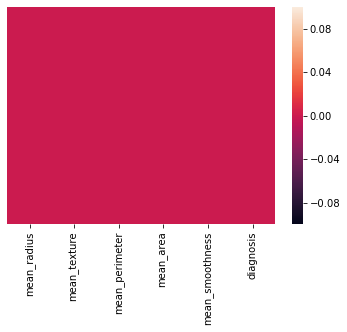

In [13]:

ax=sns.heatmap(data.isnull(),yticklabels=False)

In [14]:
data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [15]:
X=data.drop('diagnosis',axis=1)
y=data['diagnosis']

In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [17]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
logmodel=LogisticRegression()

In [30]:
logmodel.fit(X_train,y_train)

C:\Users\prateek\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
predictions=logmodel.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

In [33]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.89      0.94      0.91        63\n           1       0.96      0.94      0.95       108\n\n    accuracy                           0.94       171\n   macro avg       0.93      0.94      0.93       171\nweighted avg       0.94      0.94      0.94       171\n'

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,predictions)

array([[ 59,   4],
       [  7, 101]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,predictions)

0.935672514619883